In [18]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from matplotlib import pyplot
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%pylab inline

df = pd.read_csv("resultados.csv")

df

Populating the interactive namespace from numpy and matplotlib


,Contagem1,Contagem2,Contagem3,Emocao1,Emocao2,Emocao3,Emocao4,Emocao5,Emocao6,Resultado
0,0.031746,0.031746,0.000000,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
1,0.033784,0.020270,0.006757,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
2,0.038462,0.057692,0.006410,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
3,0.036232,0.043478,0.007246,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
4,0.112676,0.042254,0.014085,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
5,0.093750,0.062500,0.015625,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
6,0.090909,0.058442,0.019481,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
7,0.050633,0.056962,0.018987,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
8,0.110236,0.023622,0.007874,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1
9,0.166667,0.065476,0.023810,0.540425,0.031623,0.007919,0.00289,0.030133,0.387011,1


In [84]:
#verificando a dimensao do problema
df.shape

(70, 10)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
Contagem1    70 non-null float64
Contagem2    70 non-null float64
Contagem3    70 non-null float64
Emocao1      70 non-null float64
Emocao2      70 non-null float64
Emocao3      70 non-null float64
Emocao4      70 non-null float64
Emocao5      70 non-null float64
Emocao6      70 non-null float64
Resultado    70 non-null int64
dtypes: float64(9), int64(1)
memory usage: 5.5 KB


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


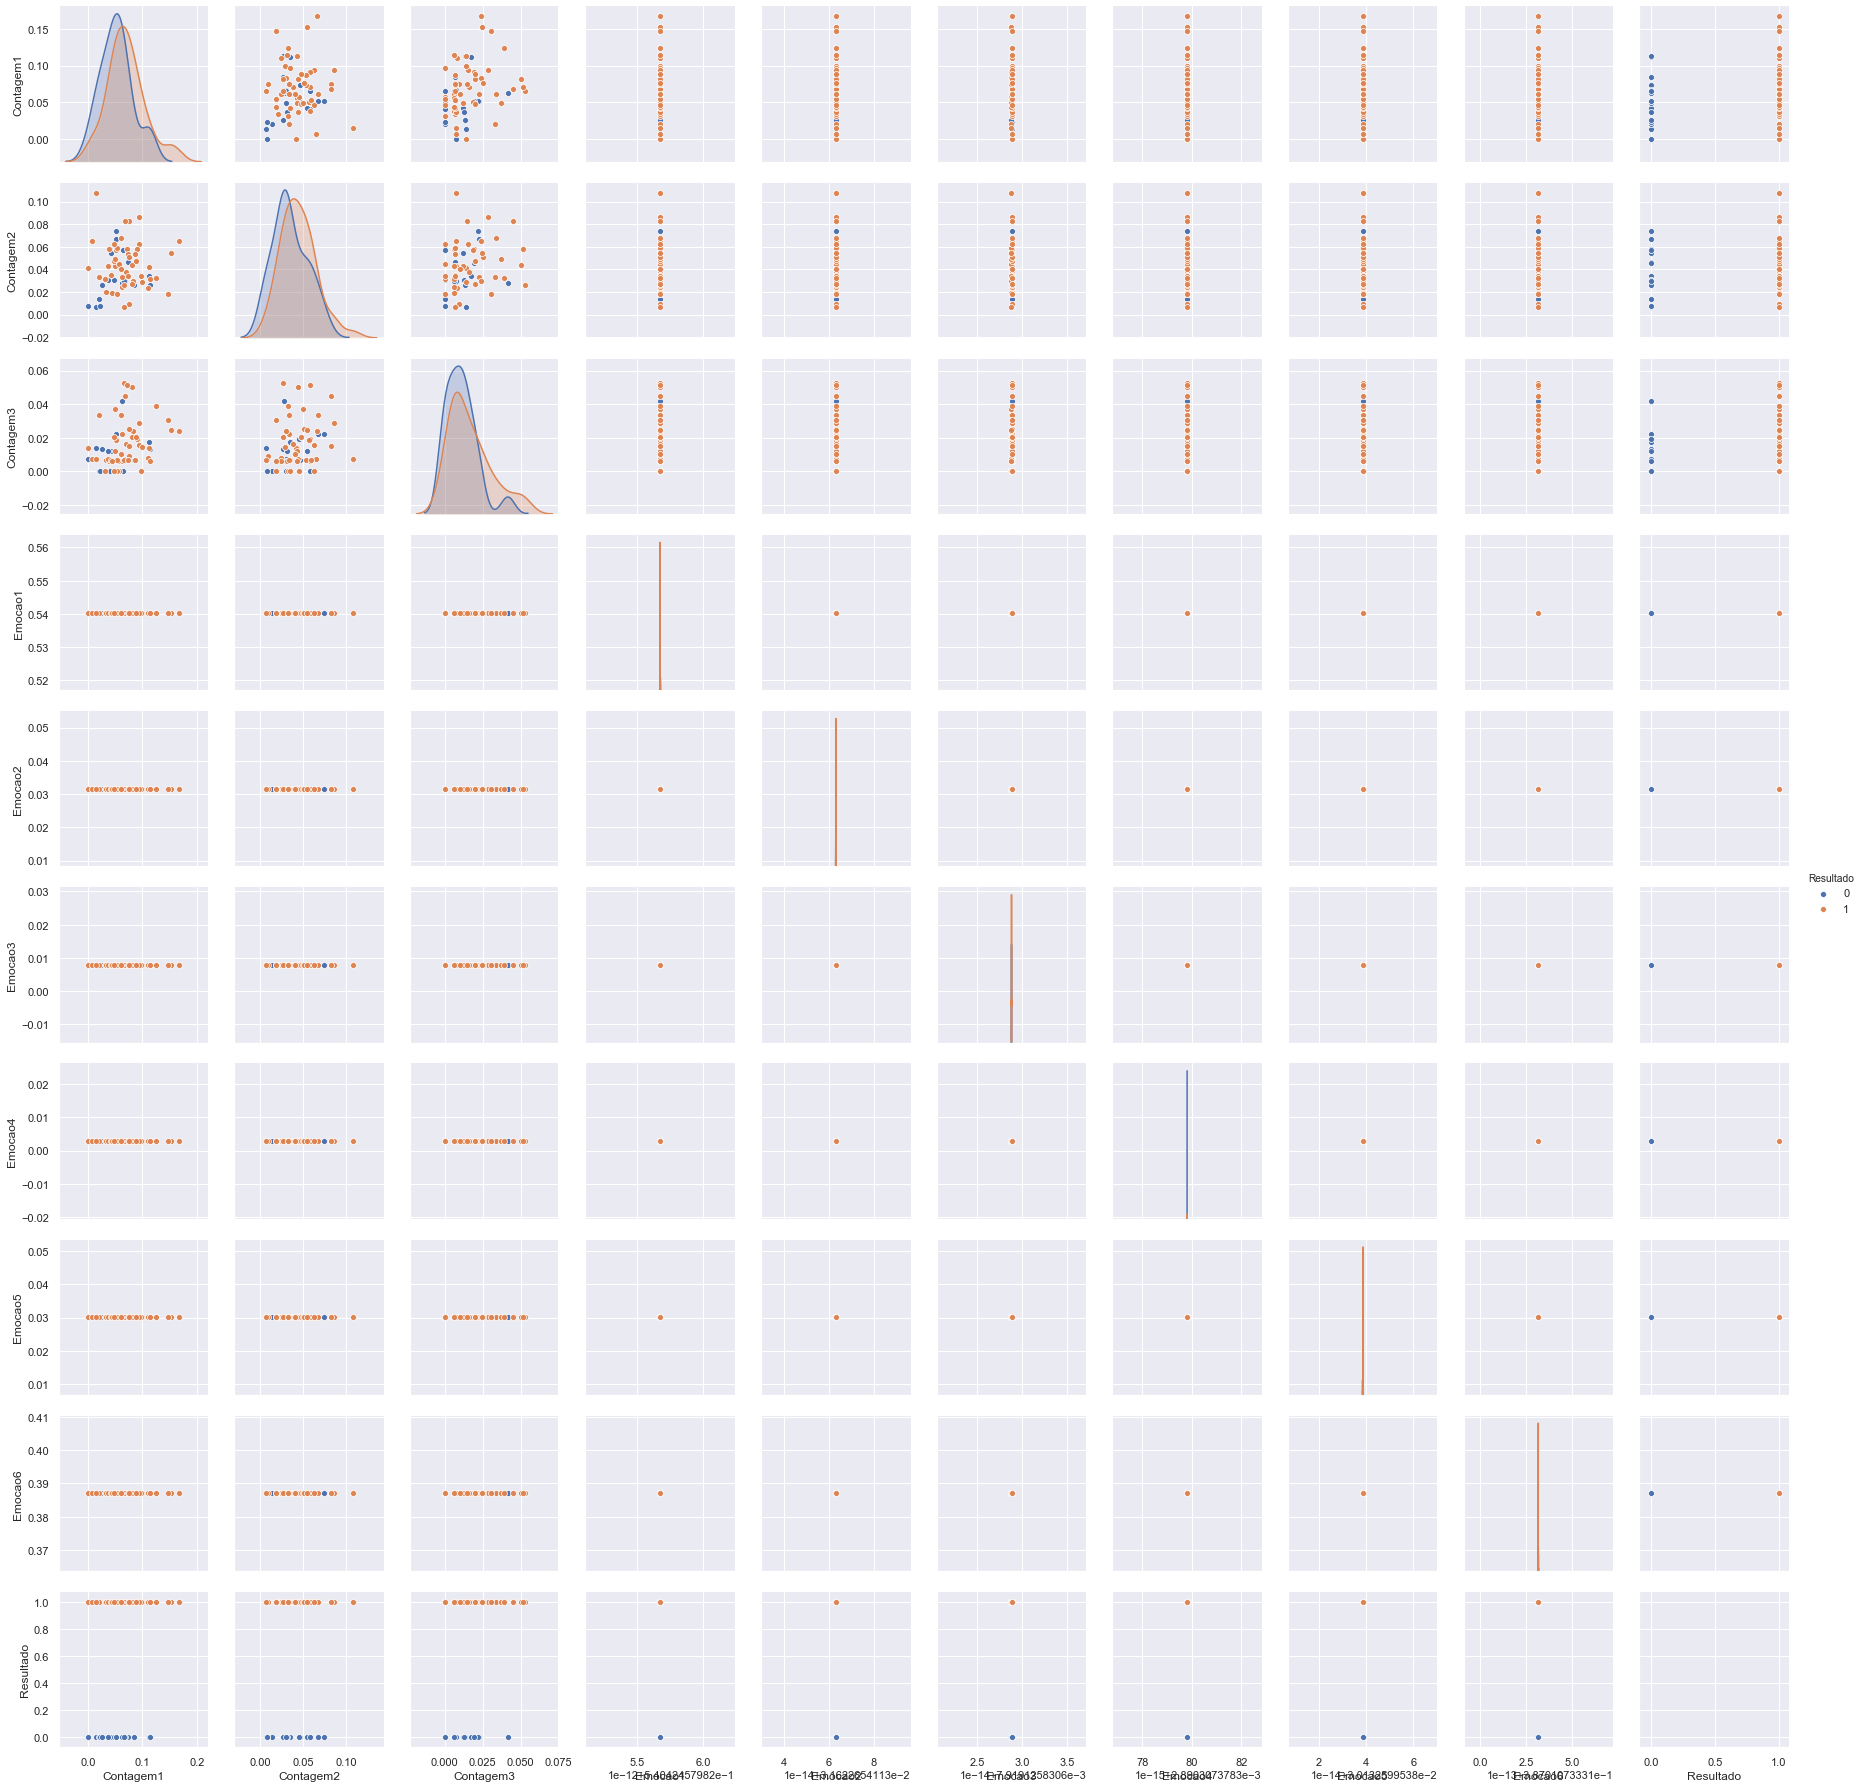

In [86]:
sns.pairplot(df, hue='Resultado')

In [19]:
dataset = df.values

# criação de recursos de entrada e variáveis de destino 
X = dataset[:, 0: 9] 
Y = dataset[:, 9]

In [20]:
# escala o conjunto de dados para que todos os recursos de entrada fiquem entre 0 e 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X

array([[0.03174603, 0.03174603, 0.        , 0.54042458, 0.03162265,
        0.00791913, 0.00289031, 0.0301326 , 0.38701073],
       [0.03378378, 0.02027027, 0.00675676, 0.54042458, 0.03162265,
        0.00791913, 0.00289031, 0.0301326 , 0.38701073],
       [0.03846154, 0.05769231, 0.00641026, 0.54042458, 0.03162265,
        0.00791913, 0.00289031, 0.0301326 , 0.38701073],
       [0.03623188, 0.04347826, 0.00724638, 0.54042458, 0.03162265,
        0.00791913, 0.00289031, 0.0301326 , 0.38701073],
       [0.11267606, 0.04225352, 0.01408451, 0.54042458, 0.03162265,
        0.00791913, 0.00289031, 0.0301326 , 0.38701073],
       [0.09375   , 0.0625    , 0.015625  , 0.54042458, 0.03162265,
        0.00791913, 0.00289031, 0.0301326 , 0.38701073],
       [0.09090909, 0.05844156, 0.01948052, 0.54042458, 0.03162265,
        0.00791913, 0.00289031, 0.0301326 , 0.38701073],
       [0.05063291, 0.05696203, 0.01898734, 0.54042458, 0.03162265,
        0.00791913, 0.00289031, 0.0301326 , 0.38701073],


In [4]:
#divide a base em 2, sendo val_and_test 30% do conjunto geral dos dados
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3, random_state = 40)



In [22]:
'''
model_3 = Sequential()
model_3.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(9,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
'''
model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_shape=(9,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation='sigmoid'))


In [23]:
model_3.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
hist_3=model_3.fit(X_train, Y_train,batch_size=10, epochs=120, verbose=1)

Epoch 1/120
49/49 [==============================] - 1s 12ms/step - loss: 0.6976 - acc: 0.5102
Epoch 2/120
49/49 [==============================] - 0s 163us/step - loss: 0.6883 - acc: 0.5918
Epoch 3/120
49/49 [==============================] - 0s 163us/step - loss: 0.6762 - acc: 0.5918
Epoch 4/120
49/49 [==============================] - 0s 204us/step - loss: 0.6765 - acc: 0.6735
Epoch 5/120
49/49 [==============================] - 0s 142us/step - loss: 0.6722 - acc: 0.6531
Epoch 6/120
49/49 [==============================] - 0s 163us/step - loss: 0.6768 - acc: 0.7143
Epoch 7/120
49/49 [==============================] - 0s 224us/step - loss: 0.6608 - acc: 0.7143
Epoch 8/120
49/49 [==============================] - 0s 183us/step - loss: 0.6579 - acc: 0.7347
Epoch 9/120
49/49 [==============================] - 0s 224us/step - loss: 0.6574 - acc: 0.6939
Epoch 10/120
49/49 [==============================] - 0s 183us/step - loss: 0.6538 - acc: 0.6735
Epoch 11/120
49/49 [====================

In [25]:
# evaluate the model
_, train_acc = model_3.evaluate(X_train, Y_train, verbose=1)
_, test_acc = model_3.evaluate(X_test, Y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

21/21 [==============================] - 0s 0us/step
Train: 0.837, Test: 0.810


KeyError: 'val_loss'

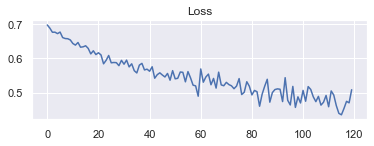

In [26]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist_3.history['loss'], label='train')
pyplot.plot(hist_3.history['val_loss'], label='test')
pyplot.legend()


KeyError: 'val_acc'

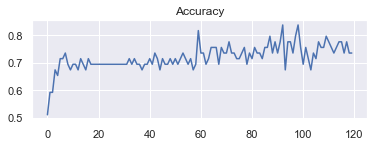

In [27]:
# plot accuracy during training

pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist_3.history['acc'], label='train')
pyplot.plot(hist_3.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()


In [28]:
y_pred_test = model_3.predict(X_test)

y_pred_test = (y_pred_test>0.5)
y_pred_test

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [14]:
Y_test

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0.])

In [29]:
# confusion matrix
confusion_matrix(Y_test,y_pred_test)

array([[ 1,  4],
       [ 0, 16]], dtype=int64)

In [82]:
#salva o modelo treinado
model_3.save('./model.h5')